In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
x = [46, 37, 35, 53]
labels  = ["10A1", "10A2", "10A3", "10A4"]

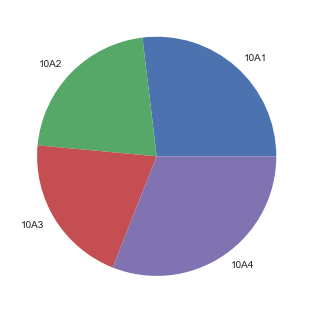

In [11]:
plt.pie(x, labels = labels)
plt.show()

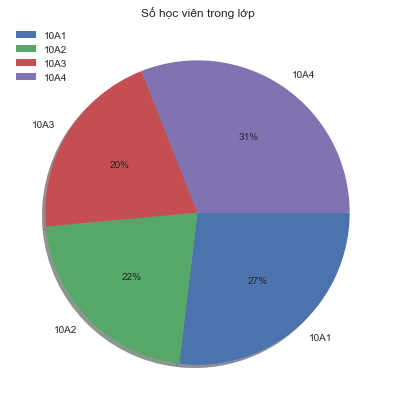

In [12]:
plt.figure(figsize=(10,7))
plt.pie(x, labels = labels, counterclock=False, shadow=True, autopct='%.0f%%')
plt.title("Số học viên trong lớp")
plt.legend(loc=2)
plt.show()

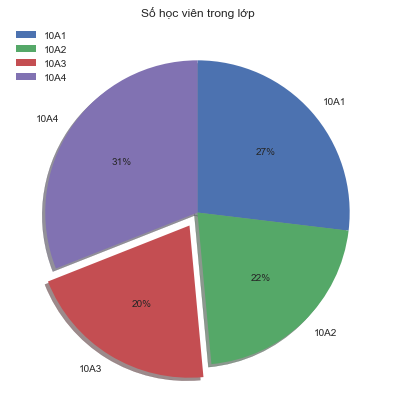

In [13]:
plt.figure(figsize=(10,7))
plt.pie(x, labels = labels, counterclock=False, shadow=True, autopct='%.0f%%', 
        explode = (0, 0, 0.1, 0), startangle=90)
plt.title("Số học viên trong lớp")
plt.legend(loc=2)
plt.show()

In [14]:
df_meal = pd.read_csv('data/meal_info.csv') 
df_center = pd.read_csv('data/fulfilment_center_info.csv') 
df_food = pd.read_csv('data/train_food.csv')

In [15]:
df = pd.merge(df_food, df_center, on='center_id') 
df = pd.merge(df,df_meal, on='meal_id')

In [16]:
data = df.groupby('cuisine', as_index=False).num_orders.sum()
data

,cuisine,num_orders
0,Continental,16914439
1,Indian,25792544
2,Italian,44172832
3,Thai,32677670


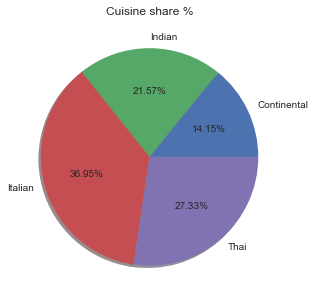

In [17]:
plt.figure(figsize=(10,5))
plt.pie(data['num_orders'], labels=data['cuisine'], autopct='%0.2f%%', shadow=True) 
plt.title('Cuisine share %') 
plt.show();

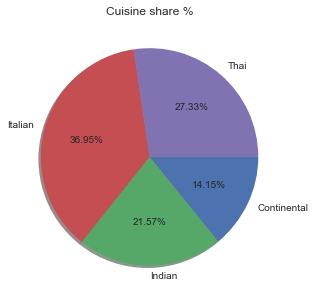

In [18]:
plt.figure(figsize=(10,5))
plt.pie(data['num_orders'], labels=data['cuisine'], autopct='%0.2f%%', shadow=True, counterclock=False) 
plt.title('Cuisine share %') 
plt.show();

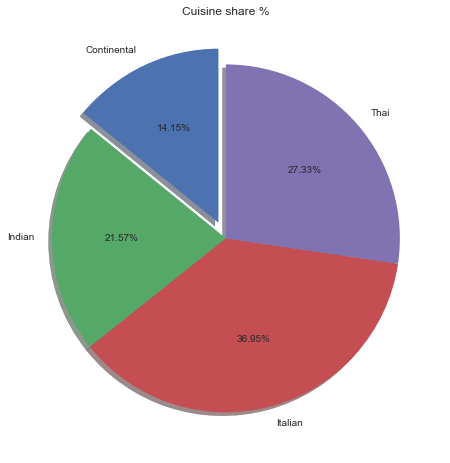

In [19]:
plt.figure(figsize=(10,8))
plt.pie(data['num_orders'], labels=data['cuisine'], autopct='%0.2f%%', shadow=True, explode = (0.1, 0, 0, 0), startangle=90) 
plt.title('Cuisine share %') 
plt.show();

In [20]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
titanic_pclass = titanic['pclass'].value_counts()
titanic_pclass

3    491
1    216
2    184
Name: pclass, dtype: int64

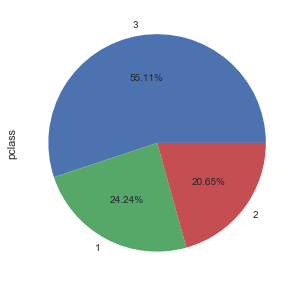

In [22]:
plt.figure(figsize=(10,5))
titanic_pclass.plot(kind='pie', autopct='%0.2f%%');

In [23]:
titanic_pclass = titanic.groupby(['pclass','survived']).size().reset_index()
titanic_pclass = titanic_pclass.rename(columns={0:'count'})
titanic_pclass

,pclass,survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [24]:
not_survived = titanic_pclass[titanic_pclass['survived']==0]
survived = titanic_pclass[titanic_pclass['survived']==1]

In [25]:
survived

,pclass,survived,count
1,1,1,136
3,2,1,87
5,3,1,119


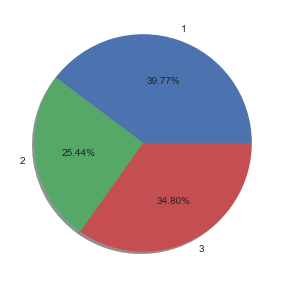

In [26]:
plt.figure(figsize=(10,5))
plt.pie(survived['count'], labels=survived['pclass'], autopct='%0.2f%%', shadow=True) 
plt.show();

In [27]:
not_survived

,pclass,survived,count
0,1,0,80
2,2,0,97
4,3,0,372


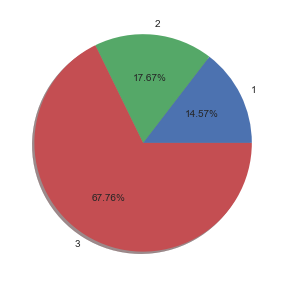

In [28]:
plt.figure(figsize=(10,5))
plt.pie(not_survived['count'], labels=not_survived['pclass'], autopct='%0.2f%%', shadow=True) 
plt.show();

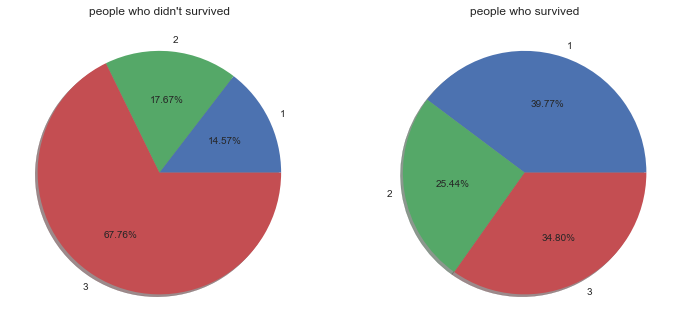

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(not_survived['count'], labels=not_survived['pclass'], autopct='%0.2f%%', shadow=True) 
plt.title('people who didn\'t survived')
plt.subplot(1,2,2)
plt.pie(survived['count'], labels=survived['pclass'], autopct='%0.2f%%', shadow=True) 
plt.title('people who survived')
plt.show();